In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import geopandas as gpd 

In [2]:
#Como trabajamos con Visual, esta línea imprime los gráficos
%matplotlib inline

In [3]:
df = pd.read_csv("../data/Data_limpia.csv")
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

Análisis exploratorio de datos (EDA)

Preguntas de exploración
1. Valores que influyen en los salarios de los profesionales
* ¿Cuánto es el salario anual promedio de acuerdo al género?
* ¿Cuánto es el salario anual promedio de acuerdo al nivel de educación?
* ¿Cuánto es el salario anual promedio de acuerdo a la empresa donde se labora?

2. Valores que influyen en la participación de estos profesionales
* ¿Cuál es el % de profesionales segun su raza?
* ¿Cuál es la participacion de profesionales segun su genero?
* ¿Cuál es la cantidad de profesionales segun su nivel de educación profesional?


2. Valores que influyen en el porcentaje de participación de estos profesionales

¿Qué % de estos profesionales son de la raza blanca, negra y mestiza?

In [4]:
df_part_race = df['Race'].value_counts().reset_index().rename(columns={'index':'Raza','Race':'Cantidad'})
df_part_race

,Raza,Cantidad
0,No especificado,33447
1,Asian,9975
2,White,6701
3,Hispanic,982
4,Two Or More,691
5,Black,618


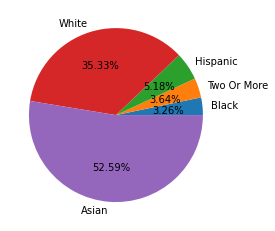

In [5]:
Race = ['Black','Two Or More','Hispanic','White','Asian']
value = [618,691,982,6701, 9975] 
plt.pie(x=value, labels=Race, autopct='%.2f%%')
plt.show()

El grafico muestra el porcentaje de participacion de los profesionales en Data Science segun su raza, observamos que las personas de raza asiatica tienen una mayor participacion como profesionales de Data Science con 52.59% seguido de la raza blanca con 35.33% y las demas raza con porcentajes de participacion pequeños. Suponiendo que no existe sesgo racial al momento de contratar, estos datos signican que las personas de las razas asiatica y blanca son las que tienen mas interes en estudiar Data Science.

¿Cuál es la cantidad de profesionales segun su genero?

In [6]:
df_part_gender = df['gender'].value_counts().reset_index().rename(columns={'index':'Genero','gender':'Cantidad'})
df_part_gender

,Genero,Cantidad
0,Male,29754
1,No especificado,16091
2,Female,6242
3,Other,327


<AxesSubplot:title={'center':'Participacion segun Genero'}, xlabel='count', ylabel='gender'>

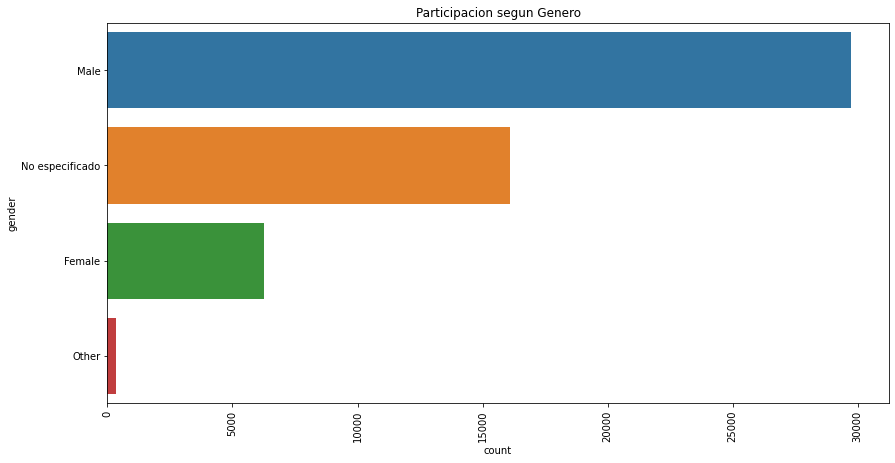

In [7]:
gender_ord = df['gender'].value_counts().sort_values(ascending=False)
order = gender_ord.index
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.title("Participacion segun Genero")
sns.countplot(data=df, y='gender', order=order)

El grafico muestra la cantidad de participacion de los profesionales en Data Science segun su genero, observamos que los hombres tienen una mayor participacion como profesionales de Data Science con 29754 profesionales. Suponiendo que no existe sesgo de genero al momento de contratar, estos datos signican que los hombres tienen mas interes en estudiar Data Science.

¿Cuál es la cantidad de profesionales segun su nivel de educación profesional?

In [8]:
part_educacion = df["Education"].value_counts().reset_index().rename(columns={'index':'Título','Education':'Cantidad'})
part_educacion

,Título,Cantidad
0,No especificado,26849
1,Master's Degree,12976
2,Bachelor's Degree,10778
3,PhD,1264
4,Some College,281
5,Highschool,266


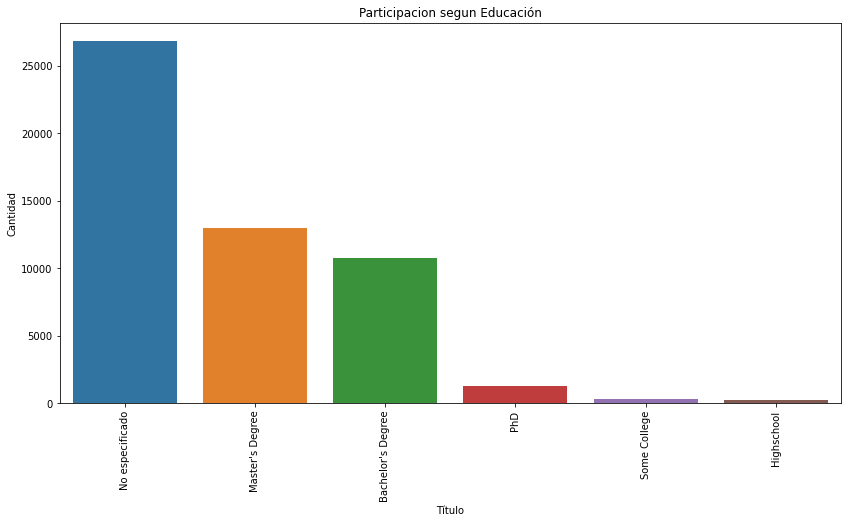

In [9]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.title("Participacion segun Educación")
sns.barplot(x='Título',y='Cantidad',data=part_educacion)
plt.show()

El grafico muestra el porcentaje de participacion de los profesionales en Data Science segun su nivel de educación, observamos que las personas con título de maestria tienen una mayor participacion como profesionales de Data Science con 12976 profesionales seguido de personas con el titulo de bachiller y los demas titulos con cantidades de participacion pequeños. Esto significa que el titulo profesional es determinante a la hora de contratar a una persona en el area de Data Science.

In [35]:
#Como observamos que solo es una fila aplicamos replace
df = df.replace(to_replace='Company: MSFT', value='Microsoft')